## ANALISIS DE FINANCIERO USANDO EL MODELO DE MONTE CARLO

#### 1. PROYECCION DE VENTAS Y GANANCIAS 
La simulación de Monte Carlo, también llamada simulación aleatoria, fue propuesta por científicos estadounidenses en la década de 1940. El método obtiene resultados aproximados mediante análisis estadístico y simulación estocástica de variables aleatorias. Tomemos como ejemplo el modelo DCF, si el flujo de efectivo libre del proyecto de inversión en el futuro se expresa como una variable aleatoria con una cierta distribución de probabilidad, podemos mejorar la precisión del modelo tradicional de acuerdo con la distribución de probabilidad de estas variables aleatorias. En condiciones manuales, es difícil para las personas realizar miles de pruebas. En este caso, las personas prefieren utilizar Matlab en la aplicación de la simulación de Monte Carlo.
En términos del proyecto, haremos las siguientes suposiciones:

- Tasa impositiva: 20% (Impuestos a las utilidades)
- Tasa de descuento: valor mínimo del 5% y valor máximo del 10%. . (Costo de capital)
- Tasa de crecimiento perpetuo: 3% (la tasa de crecimiento perpetuo suele estar entre la tasa de inflación histórica del 2-3% y la tasa de crecimiento del PIB histórica del 4-5%).
- Múltiplo EV/EBITDA de 2019: 5x, que es igual a 623,4 / 123,10. Estamos utilizando estos datos debido al EBITDA negativo en 2020. EV=Valor Empresarial=Capitalización de mercado +
deuda total−efectivo y equivalentes de efectivo
EBITDA=Ganancias antes de intereses, impuestos, depreciación
y amortizac
​

- Precio por acción: CHF 96,65
- Precio actual por acción: CHF 140,40
- Acciones en circulación: 4.479.637,00
- Capitalización bursátil 2020: CHF 431,9M
- Capitalización bursátil 2019: CHF 623,4M

Para el proyecto, los datos utilizados consisten en los estados financieros de una empresa suiza (que eran públicos). La empresa cotiza en la Bolsa de Valores de Suiza. En lo que respecta al proyecto, no se revelará el nombre de la empresa (solo para no crearles ningún problema).
Además, en lo que respecta a los cálculos que se realizarán en el desarrollo del proyecto, agregaremos algunos supuestos adicionales que respalden los cálculos y la utilización del método de simulación de Monte Carlo en relación con la evaluación de la empresa.

Parámetros del análisis:
1. Intervalo de tiempo: más de 5 años de datos históricos (estados financieros), 18 años de datos históricos de ventas y 5 años de predicción.
2. Cálculos adicionales basados ​​en las predicciones.
3. Estados financieros de la empresa.
4. Modelo de Excel con el cálculo del flujo de caja descontado que se utilizará para las simulaciones.

In [1]:
%matplotlib inline

In [2]:
import sys
!{sys.executable} -m pip install xlwings pandas matplotlib nose numpy seaborn ipython


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import xlwings as xw
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
import os
import seaborn as sns
from IPython.display import Markdown, display
from numpy.random import uniform
from xlwings.utils import rgb_to_int

# Configuración de estilo de los gráficos de matplotlib
sns.set_style("darkgrid")
#se elimino nose.tools en su lugar se puede usar unittesy para pruebas unitarias

#### I. Obtención, depuración y exploración de los datos
Obtención de la información de los archivos preparados que se utilizarán para el análisis y las simulaciones.
En esta sección, depuraremos y exploraremos un poco los datos mientras los preparamos para la creación del modelo. Además, presentaremos y veremos las fórmulas principales que se necesitarán para construir el modelo DCF y ejecutar la simulación de Monte Carlo.

In [4]:
print(os.getcwd()) #muestra el directorio actual de trabajo

C:\Users\Asus\python_finanzas\Simulacion Monte Carlo


In [5]:
print(os.listdir(os.getcwd())) #lista todos los archivos y carpetas dentro del directorio

['.ipynb_checkpoints', 'balance-general-trad-2020-2016.xlsx', 'Company Sales in Million CHF Data.xlsx', 'Consolidated-Balance-Sheet-2020-2016-en.xlsx', 'CONSOLIDATED_INCOME_STATEMENT_2016-2020.xlsx', 'Consolidated_Reports_2016-2020.xlsx', 'DCF_file_Statement.xlsx', 'DCF_Model_Monte_Carlo.xlsx', 'estado-de-resultados-2020-2016.xlsx', 'Flujo_de_caja.xlsx', 'MonteCarlo.ipynb', 'reportes-consolidados.xlsx']


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
balance_sheet=pd.read_excel("balance-general-trad-2020-2016.xlsx")
balance_sheet

,BALANCE GENERAL (Expresado en millones),2016,2017,2018,2019,2020,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Caja y bancos,365.6,243.3,256.2,284.1,282.3,NaN,NaN,NaN,NaN
1,Cuentas por cobrar C/P,7.0,1.1,0.9,0.9,0.9,NaN,NaN,NaN,NaN
2,Cuentas por cobrar,59.4,88.3,80.2,68.2,50.4,NaN,NaN,NaN,NaN
3,Otras cuentas por cobrar,47.1,62.1,43.7,24.2,26.1,NaN,NaN,NaN,NaN
4,RE-IVA,0.0,0.0,0.0,6.9,3.5,NaN,NaN,NaN,NaN
5,Inventarios,163.2,192.4,186.6,182.9,192.5,NaN,NaN,NaN,NaN
6,Activos mantenidos para la venta,11.5,11.0,10.2,0.0,0.0,NaN,NaN,NaN,NaN
7,TOTAL ACTIVOS CORRIENTES,653.8,598.2,577.8,567.2,555.7,NaN,NaN,NaN,NaN
8,Activos Fijos,237.2,232.6,212.8,209.7,210.6,NaN,NaN,NaN,NaN
9,Activos intangibles y fondos de comercio,10.1,107.8,98.0,93.6,89.5,NaN,NaN,NaN,NaN


In [8]:
balance_sheet_fin=balance_sheet.fillna('-')

In [9]:
balance_sheet_fin #reemplaza los NaN por -

,BALANCE GENERAL (Expresado en millones),2016,2017,2018,2019,2020,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Caja y bancos,365.6,243.3,256.2,284.1,282.3,-,-,-,-
1,Cuentas por cobrar C/P,7.0,1.1,0.9,0.9,0.9,-,-,-,-
2,Cuentas por cobrar,59.4,88.3,80.2,68.2,50.4,-,-,-,-
3,Otras cuentas por cobrar,47.1,62.1,43.7,24.2,26.1,-,-,-,-
4,RE-IVA,0.0,0.0,0.0,6.9,3.5,-,-,-,-
5,Inventarios,163.2,192.4,186.6,182.9,192.5,-,-,-,-
6,Activos mantenidos para la venta,11.5,11.0,10.2,0.0,0.0,-,-,-,-
7,TOTAL ACTIVOS CORRIENTES,653.8,598.2,577.8,567.2,555.7,-,-,-,-
8,Activos Fijos,237.2,232.6,212.8,209.7,210.6,-,-,-,-
9,Activos intangibles y fondos de comercio,10.1,107.8,98.0,93.6,89.5,-,-,-,-


In [10]:
balance_sheet.shape #muestra el tamaño

(38, 10)

In [11]:
balance_sheet.dtypes #muestra los tipos de datos

BALANCE GENERAL (Expresado en millones)     object
2016                                       float64
2017                                       float64
2018                                       float64
2019                                       float64
2020                                       float64
Unnamed: 6                                 float64
Unnamed: 7                                  object
Unnamed: 8                                 float64
Unnamed: 9                                  object
dtype: object

In [12]:
balance_sheet.columns

Index(['BALANCE GENERAL (Expresado en millones)',
                                            2016,
                                            2017,
                                            2018,
                                            2019,
                                            2020,
                                    'Unnamed: 6',
                                    'Unnamed: 7',
                                    'Unnamed: 8',
                                    'Unnamed: 9'],
      dtype='object')

##### ESTADO DE RESULTADOS

In [13]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'balance-general-trad-2020-2016.xlsx',
 'Company Sales in Million CHF Data.xlsx',
 'Consolidated-Balance-Sheet-2020-2016-en.xlsx',
 'CONSOLIDATED_INCOME_STATEMENT_2016-2020.xlsx',
 'Consolidated_Reports_2016-2020.xlsx',
 'DCF_file_Statement.xlsx',
 'DCF_Model_Monte_Carlo.xlsx',
 'estado-de-resultados-2020-2016.xlsx',
 'Flujo_de_caja.xlsx',
 'MonteCarlo.ipynb',
 'reportes-consolidados.xlsx']

In [14]:
estado_de_resultados=pd.read_excel('estado-de-resultados-2020-2016.xlsx')

In [15]:
estado_de_resultados

,ESTADO DE RESULTADOS Expresado en millones,2016,2017,2018,2019,2020
0,Ventas,945.000000,965.600,1075.20,760.00,573.00
1,Costos de produccion,-699.300000,-714.544,-782.70,-549.90,-439.20
2,Utilidad Bruta,245.700000,251.056,292.50,210.10,133.80
3,Gastos de investigacion y desarrollo,0.000000,0.000,-51.90,-53.20,-52.50
4,Gastos administrativos,-166.900000,-196.800,-215.10,-189.10,-168.80
5,Otros gastos,20.800000,21.400,23.70,123.60,15.20
6,Otros ingresos,-43.100000,-59.860,-6.00,-6.50,-12.10
7,Utilidad operativa antes de impuestos (UAI),56.500000,15.796,43.20,84.90,-84.40
8,Participación en utilidades de empresas asociadas,0.400000,0.700,1.40,0.90,-0.30
9,Ingresos financieros,3.200000,3.900,2.70,4.60,2.20


In [16]:
estado_de_resultados_fin=estado_de_resultados.fillna('-')
estado_de_resultados_fin

,ESTADO DE RESULTADOS Expresado en millones,2016,2017,2018,2019,2020
0,Ventas,945.0,965.6,1075.2,760.0,573.0
1,Costos de produccion,-699.3,-714.544,-782.7,-549.9,-439.2
2,Utilidad Bruta,245.7,251.056,292.5,210.1,133.8
3,Gastos de investigacion y desarrollo,0.0,0.0,-51.9,-53.2,-52.5
4,Gastos administrativos,-166.9,-196.8,-215.1,-189.1,-168.8
5,Otros gastos,20.8,21.4,23.7,123.6,15.2
6,Otros ingresos,-43.1,-59.86,-6.0,-6.5,-12.1
7,Utilidad operativa antes de impuestos (UAI),56.5,15.796,43.2,84.9,-84.4
8,Participación en utilidades de empresas asociadas,0.4,0.7,1.4,0.9,-0.3
9,Ingresos financieros,3.2,3.9,2.7,4.6,2.2


In [17]:
estado_de_resultados.shape

(19, 6)

In [18]:
estado_de_resultados.dtypes

ESTADO DE RESULTADOS Expresado en millones     object
2016                                          float64
2017                                          float64
2018                                          float64
2019                                          float64
2020                                          float64
dtype: object

In [19]:
reportes_consolidados=pd.read_excel("reportes-consolidados.xlsx")
reportes_consolidados

,AÑOS,unidad,2016,2017,2018,2019,2020
0,Estado de resultados consolidado 2016-2020,unidad,2016.0,2017.0,2018.0,2019.0,2020.0
1,Ventas,millones,945.0,965.6,1075.2,760.0,573.0
2,- Paises Asiaticos,millones,286.0,319.0,434.0,293.0,185.0
3,-China,millones,187.0,184.0,149.0,137.0,93.0
4,-India,millones,182.0,174.0,146.0,100.0,51.0
5,-Turquia,millones,119.0,100.0,155.0,67.0,122.0
6,-Norte y sur America,millones,87.0,115.0,109.0,106.0,66.0
7,-Europa,millones,41.0,46.0,47.0,41.0,38.0
8,-Africa,millones,43.0,28.0,36.0,16.0,18.0
9,"Resultado operativo antes de intereses, impues...",millones,95.8,64.7,84.1,123.1,-46.7


In [20]:
reportes_consolidados_fin=reportes_consolidados.fillna("-")
reportes_consolidados_fin

,AÑOS,unidad,2016,2017,2018,2019,2020
0,Estado de resultados consolidado 2016-2020,unidad,2016.0,2017.0,2018.0,2019.0,2020.0
1,Ventas,millones,945.0,965.6,1075.2,760.0,573.0
2,- Paises Asiaticos,millones,286.0,319.0,434.0,293.0,185.0
3,-China,millones,187.0,184.0,149.0,137.0,93.0
4,-India,millones,182.0,174.0,146.0,100.0,51.0
5,-Turquia,millones,119.0,100.0,155.0,67.0,122.0
6,-Norte y sur America,millones,87.0,115.0,109.0,106.0,66.0
7,-Europa,millones,41.0,46.0,47.0,41.0,38.0
8,-Africa,millones,43.0,28.0,36.0,16.0,18.0
9,"Resultado operativo antes de intereses, impues...",millones,95.8,64.7,84.1,123.1,-46.7


In [21]:
reportes_consolidados.dtypes

AÑOS       object
unidad     object
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
dtype: object

In [22]:
reportes_consolidados_fin.shape #dimensiones del df

(42, 7)

In [23]:
flujo_de_caja=pd.read_excel("Flujo_de_caja.xlsx")
flujo_de_caja

""


In [24]:
flujo_de_caja_fin=flujo_de_caja.fillna(" ")
flujo_de_caja_fin

""


#### Tambien se puede visualizar el codigo con xlwings que abre el archivo que estamos usando cuando se ejecuta el codigo

Carga del archivo de Excel con el modelo de cálculo de Flujo de Caja Descontado (DCF) creado especialmente para este proyecto y la simulación.
En este caso, leeremos y modificaremos los datos del modelo, así como almacenaremos el resultado necesario en hojas específicas.
* El archivo se guarda y cierra automáticamente después de que se ejecuta el código hasta el final del cuaderno Jupyter.

Cuando comencé a buscar los datos y las bibliotecas que necesitaría para completar mi proyecto, encontré la biblioteca xlwings y me enamoré de ella. Esta es una biblioteca increíble que hace que algunas de las características de análisis de datos de Python estén disponibles en una instancia de Excel, incluido el soporte para matrices numpy y series y marcos de datos de pandas.

Cargando el archivo DCF_Model con xlwings y tomando la Hoja1, donde se construye el modelo con las fórmulas. Este es el modelo que necesitaremos más adelante para las simulaciones.
Y veremos los valores de algunas de las celdas importantes que están disponibles al momento de abrir el archivo.
Así mismo, iniciamos con la presentación y explicación de las principales fórmulas matemáticas utilizadas en el área de Modelado y Análisis Financiero, las cuales son utilizadas para la creación de modelos en Excel.

In [25]:
dfc_file=xw.Book("Flujo_de_caja.xlsx")
dfc_model=dfc_file.sheets("Hoja1")

In [26]:
dfc_file.sheets

Sheets([<Sheet [Flujo_de_caja.xlsx]Simulation>, <Sheet [Flujo_de_caja.xlsx]Sales Forecast>, <Sheet [Flujo_de_caja.xlsx]Hoja1>])

In [27]:
#Leemos los datos del 2020 del archivo
ventas_2020=dfc_model.range('F16').value
ventas_2020

573.0

In [28]:
#ahora de los datos de 2021 en adelante
ventas_2021=dfc_model.range('G16').value
ventas_2022=dfc_model.range('H16').value
ventas_2023=dfc_model.range('J16').value
ventas_2024=dfc_model.range('I16').value
ventas_2025=dfc_model.range('K16').value
ventas_2021,ventas_2022,ventas_2023,ventas_2024,ventas_2025

(573.6269504482071,
 574.2545868769806,
 575.5119206793223,
 574.882910036889,
 576.1416195564924)

#### Utilidad Bruta

El beneficio bruto es el beneficio que obtiene una empresa después de deducir los costes asociados a la fabricación y venta de sus productos, o los costes asociados a la prestación de sus servicios. El beneficio bruto aparecerá en el estado de resultados de una empresa y se puede calcular restando el coste de los bienes vendidos (COGS) de los ingresos (ventas).

#### COGS formula

El costo de los bienes vendidos (COGS) se refiere a los costos directos de producir los bienes que vende una empresa. Este monto incluye el costo de los materiales y la mano de obra utilizados directamente para crear el bien. Excluye los gastos indirectos, como los costos de distribución y los costos de la fuerza de ventas.

COGS=Inventario Inicial + compras durante el periodo - inventario final \
Utilidad Bruta = Ingresos por ventas - COGS \
Utilizaremos la segunda fórmula, asumiendo que el beneficio bruto es el 38% de los ingresos brutos (ingresos por ventas), es decir:\
COGS=Ingreso por ventas-Utilida Bruta

In [29]:
# Lectura de los datos iniciales de la utilidad bruta prevista y el costo de los bienes vendidos (COGS) para un período de 5 años desde el 
#archivo DCF_Model.
# Los datos se volverán a calcular en función de los supuestos del modelo de simulación.
utilidad_bruta_2021=dfc_model.range('G19').value
cogs_2021=dfc_model.range('G18').value
utilidad_bruta_2022=dfc_model.range('H19').value
cogs_2022=dfc_model.range('H18').value
utilidad_bruta_2023=dfc_model.range('I19').value
cogs_2023=dfc_model.range('I18').value
utilidad_bruta_2024=dfc_model.range('J19').value
cogs_2024=dfc_model.range('J18').value
utilidad_bruta_2025=dfc_model.range('K19').value
cogs_2025=dfc_model.range('K18').value

In [30]:
utilidad_bruta_2021,utilidad_bruta_2022,utilidad_bruta_2023,utilidad_bruta_2024,utilidad_bruta_2025

(217.9782411703187,
 218.21674301325265,
 218.45550581401784,
 218.6945298581425,
 218.9338154314671)

In [31]:
cogs_2021,cogs_2022,cogs_2023,cogs_2024,cogs_2025

(-355.64870927788843,
 -356.03784386372797,
 -356.4274042228712,
 -356.81739082117986,
 -357.2078041250253)

#### Gasto de venta, generales, y administrativos (Gastos operativos o SG&A)
Los gastos de venta, generales y administrativos (SG&A) se incluyen en el estado de resultados en la sección de gastos. Los SG&A no se asignan a un producto específico y, por lo tanto, no se incluyen en el costo de los bienes vendidos (COGS). Los SG&A se incurren como parte de las operaciones comerciales diarias.
En nuestro caso, utilizaremos una constante de 170,00 MCHF como SG&A para los 5 años previstos.

#### Depreciacion y Amortizacion

La amortización y la depreciación son dos métodos para calcular el valor de los activos de una empresa a lo largo del tiempo. Una empresa calculará estos importes de gastos para utilizarlos como deducción fiscal y reducir su obligación tributaria.
En el modelo actual, utilizaremos un valor constante de 39,8 millones de francos suizos.

In [32]:
gastos_operativos=dfc_model.range('B11').value
depreciacion_amortizacion=dfc_model.range('B8').value
gastos_operativos,depreciacion_amortizacion

(170.0, 39.8)

#### Ganancia antes de intereses e Impuestos (EBIT)
Este es un indicador de la rentabilidad de una empresa. El EBIT se puede calcular como ingresos menos gastos, excluidos los impuestos e intereses. El EBIT también se conoce como ganancias operativas, beneficio operativo y beneficio antes de intereses e impuestos.\
Cálculo del valor previsto de las Ganancias antes de intereses e impuestos (EBIT) utilizando la siguiente fórmula:\
EBIT=Ingresos por ventas-COGS(Costo de ventas)-Gastos operativos\
Donde gastos operativos=Gastos administrativos, generales y de venta + depreciacion y amortizacion 

#### Ganancia antes de intereses e impuestos, depreciacion y amortizacion (EBITDA)
El EBITDA es una métrica ampliamente utilizada para medir la rentabilidad corporativa.\
El EBITDA se puede utilizar para comparar empresas entre sí y con los promedios de la industria.\
El EBITDA se puede utilizar para analizar y comparar la rentabilidad entre empresas e industrias, ya que elimina los efectos de los gastos de financiación y de capital.\
Cálculo del valor estimado del EBITDA en función de la siguiente fórmula:\
EBITDA=utilidad bruta - (COGS + Gastos administrativos, de ventas y generales)

In [33]:
ebit_2021=dfc_model.range('G25').value
ebitda_2021=dfc_model.range('G21').value
ebit_2022=dfc_model.range('h25').value
ebitda_2022=dfc_model.range('h21').value
ebit_2023=dfc_model.range('i25').value
ebitda_2023=dfc_model.range('i21').value
ebit_2024=dfc_model.range('j25').value
ebitda_2024=dfc_model.range('j21').value
ebit_2025=dfc_model.range('k25').value
ebitda_2025=dfc_model.range('k21').value

In [34]:
ebit_2021,ebit_2022,ebit_2023,ebit_2024,ebit_2025

(8.178241170318714,
 8.416743013252656,
 8.655505814017843,
 8.89452985814249,
 9.133815431467113)

In [35]:
ebitda_2021,ebitda_2022,ebitda_2023,ebitda_2024,ebitda_2025

(47.97824117031871,
 48.21674301325265,
 48.45550581401784,
 48.69452985814249,
 48.93381543146711)

### Utilidad Neta
El ingreso neto o utilidad neta es el resultado de las ventas menos el costo de ventas, gastos generales, impuestos e intereses, representa el beneficio que obtiene la empresa despues de deducir todos los gastos, costos e impuestos de sus ingresos totales\
Utilidad Neta = Ingresos Totales - Costos Totales - Gastos Operativos - Gastos no operativos - impuestos \
o\
Utilidad Neta = EBIT - Intereses - impuesto a las utilidades\
Para construir el modelo, aplicamos otro supuesto: los gastos de intereses son constantes en 1,25 millones de francos suizos y la tasa impositiva es del 20 % (lo que no es la realidad en Suiza). Estos supuestos serán necesarios para facilitar el cálculo.

In [36]:
gastos_intereses = dfc_model.range('B9').value
tasa_de_impuestos= dfc_model.range('b5').value
gastos_intereses,tasa_de_impuestos

(1.25, 0.2)

### Impuesto a las utilidades
Se trata de un tipo de impuesto que los gobiernos imponen sobre los ingresos generados por empresas e individuos dentro de su jurisdicción. El impuesto sobre la renta se utiliza para financiar servicios públicos, pagar obligaciones gubernamentales y proporcionar bienes a los ciudadanos.
Utilizaremos la siguiente fórmula para calcular el monto del impuesto:
IUE= Tasa_de_impuestos*EBIT

In [37]:
IUE_2021=dfc_model.range('g28').value
IUE_2022=dfc_model.range('h28').value
IUE_2023=dfc_model.range('i28').value
IUE_2024=dfc_model.range('j28').value
IUE_2025=dfc_model.range('k28').value

IUE_2021,IUE_2022,IUE_2023,IUE_2024,IUE_2025

(-1.6356482340637428,
 -1.6833486026505313,
 -1.7311011628035686,
 -1.7789059716284983,
 -1.8267630862934228)

In [38]:
utilidad_neta_2021=dfc_model.range('G29').value
utilidad_neta_2022=dfc_model.range('h29').value
utilidad_neta_2023=dfc_model.range('I29').value
utilidad_neta_2024=dfc_model.range('J29').value
utilidad_neta_2025=dfc_model.range('K29').value

utilidad_neta_2021,utilidad_neta_2022,utilidad_neta_2023,utilidad_neta_2024,utilidad_neta_2025

(5.292592936254971,
 5.483394410602125,
 5.6744046512142745,
 5.865623886513992,
 6.05705234517369)

### Capital de trabajo neto (NWC)
El capital de trabajo neto es la diferencia entre los activos corrientes y los pasivos corrientes de una empresa. El capital de trabajo neto se calcula utilizando partidas del balance de una empresa. Por lo general, cuanto mayor sea el saldo de capital de trabajo neto, más probable es que su empresa pueda cubrir sus obligaciones actuales.
En el modelo, seguiremos la tendencia decreciente de los 5 años históricos y la aplicaremos en el pronóstico utilizando un valor constante de -30,70 millones de francos suizos de cambio en el capital de trabajo neto.

In [39]:
cambios_nwc=dfc_model.range('B12').value
cambios_nwc

-30.7

In [40]:
nwc_2020=dfc_model.range('f31').value
nwc_2021=dfc_model.range('g31').value
nwc_2022=dfc_model.range('h31').value
nwc_2023=dfc_model.range('i31').value
nwc_2024=dfc_model.range('j31').value
nwc_2025=dfc_model.range('k31').value
nwc_2020,nwc_2021,nwc_2022,nwc_2023,nwc_2024,nwc_2025

(127.40000000000003,
 96.70000000000003,
 66.00000000000003,
 35.300000000000026,
 4.600000000000026,
 -26.099999999999973)

### Gastos de Capital (CAPEX)
Son fondos que utiliza una empresa para adquirir, mejorar y mantener activos físicos, como propiedades, plantas, edificios, tecnología o equipos. Los gastos de capital suelen utilizarse para llevar a cabo nuevos proyectos o inversiones por parte de una empresa.Inversiones en activos a largo plazo que generan beneficios futuros.\
CAPEX=PP&E_final - PP&E_inicio + depreciacion\
donde:\
PP&E=planata,propiedad y equipos

In [41]:
CAPEX_proyectado=dfc_model.range('b7').value
CAPEX_proyectado

0.03635904567017259

In [42]:
CAPEX_2021=dfc_model.range('G33').value
CAPEX_2022=dfc_model.range('H33').value
CAPEX_2023=dfc_model.range('I33').value
CAPEX_2024=dfc_model.range('J33').value
CAPEX_2025=dfc_model.range('K33').value
CAPEX_2021,CAPEX_2022,CAPEX_2023,CAPEX_2024,CAPEX_2025

(-22.917106485909784,
 -25.20881713450076,
 -27.729698847950836,
 -30.502668732745917,
 -33.55293560602051)

### Flujo de Caja Libre
El flujo de caja libre (FCF) representa el efectivo que genera una empresa después de contabilizar las salidas de efectivo para respaldar las operaciones y mantener sus activos de capital. A diferencia de las ganancias o el ingreso neto, el flujo de caja libre es una medida de rentabilidad que excluye los gastos no monetarios del estado de resultados e incluye el gasto en equipos y activos, así como los cambios en el capital de trabajo del balance general.
Flujo de Caja Libre = EBIT * (1-tasa de impuestos) + depreciacion y amortizacion - CAPEX - Cambios en NWC \
o \
Flujo de Caja Libre = Utilidad neta + intereses e impuestos + depreciacion y amortizacion - CAPEX - cambios en NWC \
Tambien existen \
flujo de caja operativo = Utilidad neta + depreciacion y amortizacion + cambios en el nwc(capital de trabajo)\
flujo de caja neto = Entradas de dinero - Salidas de Dinero \
o \
flujo de caja neto = Utilidad neta + depreciacion + amortizacion - cambios en NWC - intereses \
Flujo de caja neto = Beneficio neto + Amortización + Provisiones + Cuentas por pagar - cuentas por cobrar


In [43]:
fcf_2021=dfc_model.range('G35').value
fcf_2022=dfc_model.range('h35').value
fcf_2023=dfc_model.range('i35').value
fcf_2024=dfc_model.range('j35').value
fcf_2025=dfc_model.range('k35').value
fcf_2021,fcf_2022,fcf_2023,fcf_2024,fcf_2025

(54.12548645034518,
 52.024577276101354,
 49.69470580326344,
 47.11295515376807,
 44.254116739153176)

### Cálculo del valor terminal
El valor terminal (VT) es el valor de un activo, negocio o proyecto más allá del período previsto en el que se pueden estimar los flujos de efectivo futuros. El valor terminal supone que un negocio crecerá a una tasa de crecimiento establecida para siempre después del período previsto. El valor terminal a menudo comprende un gran porcentaje del valor total tasado. Estos son dos métodos comúnmente utilizados para calcular el valor terminal: crecimiento perpetuo (modelo de crecimiento de Gordon) y múltiplo de salida. En el modelo, utilizaré el método del múltiplo de salida, donde se supone que un negocio se venderá por un múltiplo de alguna métrica de mercado. Ya dijimos al comienzo del proyecto que utilizaremos el valor EV/EBITDA de 2019, donde el múltiplo es 5x y el último EBTDA calculado al final del quinto año según la proyección. \
TV = (FCF * (1+g))/(d-g) \
donde: \
FCF= Flujo de caja libre
g = tasa de crecimiento anual
d = tasa de descuento (que suele ser el coste medio ponderado del capital)

In [44]:
multiplo = dfc_model.range('E4').value
tv=dfc_model.range('K38').value
tv

247.80942761963115

### Fórmula de flujo de caja descontado
El flujo de caja descontado (DCF) es un método de valoración que se utiliza para estimar el valor de una inversión en función de sus flujos de caja futuros esperados. El análisis de DCF intenta determinar el valor actual de una inversión, en función de las proyecciones de cuánto dinero generará en el futuro. La fórmula para el DCF es:

\begin{aligned}
&DCF=\frac{CF_1}{(1+r)^1}+\frac{CF_2}{(1+r)^2}+\frac{CF_n}{(1+r)^n} \\
&\textbf{where:} \\
&CF=\text{The cash flow for the given year.} \\
&\quad\quad\text{$CF_1$ is for year one, $CF_2$ is for year two,} \\
&\quad\quad\text{$CF_n$ is for additional years} \\
&r=\text{The discount rate}
\end{aligned}


### Valor actual (VP)
El valor actual (VP) es el valor actual de una suma futura de dinero o flujo de efectivo dada una tasa de rendimiento específica. Los flujos de efectivo futuros se descuentan a la tasa de descuento y, cuanto mayor sea la tasa de descuento, menor será el valor actual de los flujos de efectivo futuros.

Fórmula y cálculo del VP:

\begin{aligned} 
&\text{Present Value} = \frac{\text{FV}}{(1+r)^n} \\
&\textbf{where:} \\
&\text{FV} = \text{Future Value} \\
&r = \text{Rate of return} \\
&n = \text{Number of periods} 
\end{aligned}


La fórmula del Valor Presente se utiliza para calcular el Valor Terminal con el fin de que sea comparable con los flujos de efectivo descontados.



In [45]:
tasa_descuento=dfc_model.range('B3').value #wacc
tv_descontado=dfc_model.range('k39').value
tv_descontado

187.361101181316

In [46]:
dfc_2021=dfc_model.range('g37').value
dfc_2022=dfc_model.range('h37').value
dfc_2023=dfc_model.range('i37').value
dfc_2024=dfc_model.range('j37').value
dfc_2025=dfc_model.range('k37').value
dfc_2021,dfc_2022,dfc_2023,dfc_2024,dfc_2025

(51.18163245173327,
 46.51930334833526,
 42.01913301037427,
 37.6694804812452,
 33.45917919144335)

### Valor de la empresa (Valor Actual Neto) 


$$Enterprise Value =
\sum _{t=1}^{n} \frac{FCFF_{t}}{(1+WACC_{t})^{t}} + \frac{\frac{FCFF_{n+1}}{(WACC_{n+1}-g_{n+1})}}{(1+WACC_{n})^{n}}
$$
\]


Donde: \
FCFF es el flujo de caja libre de la empresa (escencialmente es el flujo de caja operativo menos los gastos de capital CAPEX) reducido por impuestos \
WACC es el costo promedio ponderado del capital que combina el costo de capital y el costo de deuda despues de impuestos \
t es el periodo de tiempo \
n es el numero de periodos de tiempo hasta el vencimiento o salida \
g es la tasa de crecimiento sostenible en ese punto 

In [47]:
VAN=dfc_model.range('k40').value
VAN

398.2098296644474

<h2 style="color:#257524">II MODELADO E INTERPRETACION</h2>
Los datos están listos para ser utilizados y el modelo para ser construido. Aquí es donde comienza la parte divertida... ¡y “donde ocurre la magia”!

### METODO MONTE CARLO USANDO PYTHON
En finanzas, gestión de proyectos, energía, fabricación, investigación, análisis de riesgos y en muchas otras áreas, la simulación Monte Carlo se utiliza para medir o tener en cuenta el riesgo y la toma de decisiones. La simulación Monte Carlo consiste básicamente en construir miles de modelos con diferentes resultados de escenarios. Al utilizar distribuciones de probabilidad, las variables pueden tener diferentes probabilidades de que se produzcan diferentes resultados. Las distribuciones de probabilidad son una forma mucho más realista de describir la incertidumbre en las variables de un análisis de riesgo. Luego calcula los resultados una y otra vez, cada vez utilizando un conjunto diferente de valores aleatorios de las funciones de probabilidad. Dependiendo de la cantidad de incertidumbres y los rangos especificados para ellas, una simulación Monte Carlo podría implicar miles o decenas de miles de recálculos antes de que se complete. La simulación Monte Carlo produce distribuciones de posibles valores de resultados.

Teniendo en cuenta la dificultad de hacer predicciones sobre lo que sucederá en el futuro, intentaré crear y utilizar tres simulaciones Monte Carlo diferentes que estén vinculadas entre sí.
La primera simulación estará relacionada con los ingresos por ventas y se basa en los datos históricos de las ventas de la empresa. La segunda simulación es la de la tasa de crecimiento de las ventas (basada en los datos históricos de las ventas de la empresa).
En la tercera simulación aplicaremos el resultado de la tasa de crecimiento de las ventas obtenido en la simulación anterior y calcularemos la simulación de Monte Carlo basándonos en los Flujos de Caja Descontados del modelo de Excel.
Y la tercera simulación sería exactamente la que nos mostraría los resultados en cuanto al Valor de la Empresa en 5 años utilizando el método de Flujos de Caja Descontados y la simulación de Monte Carlo.

### Proyeccion de ingresos por ventas
Y aquí está el comienzo de la construcción de mi primer modelo de simulación con respecto a la previsión de ingresos por ventas. En la parte siguiente, ejecutaremos la simulación y exportaremos el resultado en el archivo de Excel utilizado para el modelado. Parte del código utilizado para las siguientes 2 simulaciones proviene de LinkBuild de Rizwan Ahmed Surhio y se modificó un poco para adaptarse al estilo y los requisitos del proyecto actual.

Al principio, carguemos los datos históricos del sitio web de la empresa en función de los informes financieros de la empresa. Estos datos se utilizarán para visualizar las tendencias históricas y calcular los valores promedio, mínimo y máximo y la desviación estándar.

In [48]:
#cargamos los datos historicos de ventas de la empresa
ventas_actuales=pd.read_excel("Company Sales in Million CHF Data.xlsx")
ventas_actuales

,Year,Sales
0,2002,2945.1
1,2003,3086.2
2,2004,3136.6
3,2005,3122.0
4,2006,3579.9
5,2007,3930.1
6,2008,3142.5
7,2009,1956.3
8,2010,2585.8
9,2011,1060.8


In [49]:
#calculamos la media,max,min de los datos obtenidos
min_ventas=ventas_actuales["Sales"].min()
max_ventas=ventas_actuales["Sales"].max()
media_ventas=ventas_actuales['Sales'].mean()
f"{min_ventas: .2f},{max_ventas: .2f}, {media_ventas: .2f}"

' 573.00, 3930.10,  1946.22'

In [50]:
    #calculamos la desviacion estandar para trabajar con una distribucion gaussiana(normal) 
std_ventas=ventas_actuales['Sales'].std()
f'{std_ventas: .2f}'

' 1148.56'

In [51]:
#en el supuesto que los ingresos por ventas siguen una distribucion normal
#3l 80% de los datos de ventas de resultados posibles deben estar en el siguiente intervalo
f'{media_ventas-std_ventas:.2f},{media_ventas+std_ventas:.2f}'


'797.66,3094.78'

In [52]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


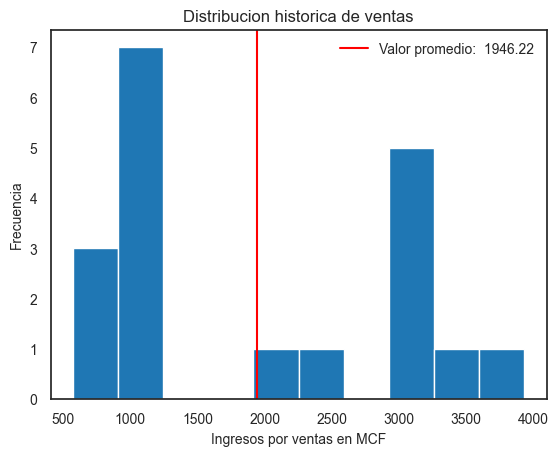

In [53]:
#trazamos un histograma con los datos de ventas historicos
plt.style.use('seaborn-v0_8-ticks')
plt.hist(ventas_actuales['Sales'],bins=10)
plt.xlabel("Ingresos por ventas en MCF")
plt.ylabel('Frecuencia')
plt.axvline(media_ventas,label=f'Valor promedio: {media_ventas: .2f}', color='r')
plt.title('Distribucion historica de ventas')
plt.legend()
plt.show()

En el histograma anterior, vemos la distribución de los ingresos por ventas históricos. No se trata de una distribución normal, pero al mismo tiempo tenemos una cantidad limitada de datos. Vemos que la mayoría de las ventas se encuentran en el rango inferior a 1500 millones de francos suizos, una cantidad muy limitada (2-3) en el rango de 1800-2600 millones de francos suizos y una cantidad alta por encima de los 2800 millones de francos suizos también. El valor promedio (media) está representado por la línea roja horizontal que muestra el valor 1946,22 millones de francos suizos.

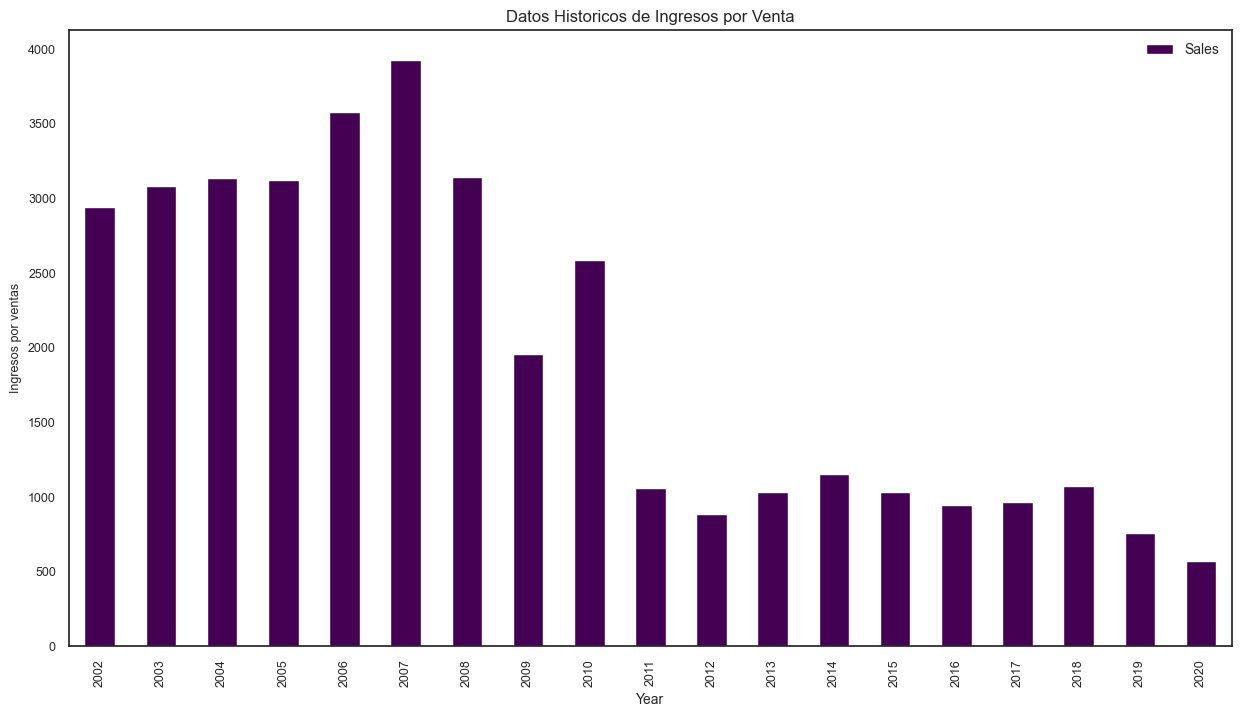

In [54]:
#trazamos un grafico segun los datos de ventas historicos
ventas_actuales.plot(x='Year',y='Sales',kind='bar',colormap='viridis',fontsize=9,figsize=(15,8))
plt.ylabel('Ingresos por ventas',fontsize=9)
plt.title('Datos Historicos de Ingresos por Venta')
plt.show()

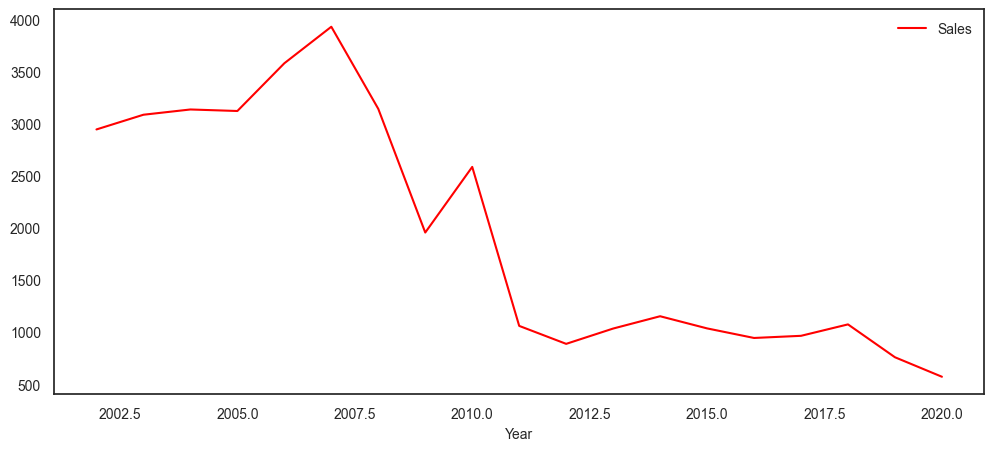

In [55]:
#Creamos un diagrama lineal que muestre la tendencia hisotorica de ventas
ventas_actuales.plot(x='Year',y='Sales',kind='line',colormap='hsv',figsize=(12,5))
plt.show()

Al revisar los gráficos de barras y líneas anteriores, veremos claramente la tendencia histórica que muestra una disminución en los ingresos por ventas.
Las razones de la disminución pueden ser muy diferentes (incluida la crisis de COVID-19 y la crisis de 2008) y no son objeto del análisis del proyecto actual.

In [56]:
#vemos los valores calculados de promedio de ingresos de ventas, minimo, maximo del conjunto de datos de ventas_actuales
print(f'Ventas Minimas:{min_ventas:.2f}\n Ventas Maximas: {max_ventas:.2f}\n Media de ventas: {media_ventas:.2f}' )

Ventas Minimas:573.00
 Ventas Maximas: 3930.10
 Media de ventas: 1946.22


En las celdas que se muestran a continuación, comenzamos a compilar el código para la previsión de ingresos por ventas mediante la simulación de Monte Carlo y configuramos un ejemplo de umbrales relacionados con las ventas y la tasa de crecimiento. Para definir los valores del umbral, se utilizan las estadísticas de ventas anteriores con valor mínimo, medio y máximo.

### Preparacion Inicial

In [57]:
iteraciones=10000
umbral_de_ventas=[500, 700, 900, 1100, 1500, 2000]
# Probabilidad/posibilidades de ingresos mayores a x cantidad en %.
umbral_de_crecimiento =[0.05,0.07,0.10,0.13,0.15,0.20]

### Visualizacion y resultados del pronostico
Se calculara la media, y la desviacion standard y se extraera muestras aleatorias de una distribucion normal, que se utilizara para pronosticar
ingresos de ventas. Asi mismo se calculara y presentara las estadisticas descriptivas y la impresion de resultados . Los datos generados por la 
simulacion se incluiran en el archivo de Excel.

In [58]:
#Se usara la media/promedio de los ingresos de años anteriores como punto de partida para el monto de ingresos esperados
utilidad_media=ventas_actuales['Sales'].mean()
utilidad_std=ventas_actuales['Sales'].std()
#Calculo de probabilidades normales aleatorias es decir las simulaciones MonteCarlo
utilidad_MonteCarlo=np.random.normal(utilidad_media,utilidad_std,iteraciones)
ventas_df=pd.DataFrame(utilidad_MonteCarlo, columns=['Forecasted Sales Revenue'])
min_ingresos=utilidad_MonteCarlo.min()
max_ingresos=utilidad_MonteCarlo.max()
media_ingresos=utilidad_MonteCarlo.mean()
volatilidad_esperada=utilidad_MonteCarlo.std()

#creamos una funcion para definir el color del encabezado
def printmd(string,color='orange'):
    colorstr="<span style='color:{}'></spna><span style='font-weight: bold'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    # Creación de estadísticas descriptivas con el resultado de la simulación de Ingresos por Ventas
rev_stats = list(np.around(np.array([min_ingresos,max_ingresos,media_ingresos,volatilidad_esperada]),2))



In [59]:
ventas_df.head()

,Forecasted Sales Revenue
0,2838.637582
1,4223.425175
2,1509.669702
3,1595.206933
4,2155.396955


In [60]:
#visualizamos las hojas existentes en el documento excel modelo
dfc_file.sheets

Sheets([<Sheet [Flujo_de_caja.xlsx]Simulation>, <Sheet [Flujo_de_caja.xlsx]Sales Forecast>, <Sheet [Flujo_de_caja.xlsx]Hoja1>])

In [61]:
# Tomar los nombres de las hojas en una nueva lista para verificar si la hoja ya existe
sNamList=[sh.name for sh in dfc_file.sheets]
sNamList

['Simulation', 'Sales Forecast', 'Hoja1']

In [62]:
#comprobamos si la hoja ya existe en el documento
if 'Sales Forecast' in sNamList:
    dfc_file.sheets('Sales Forecast').clear()
else:
    ventas_sim_sht=dfc_file.sheets.add('Sales Forecast')

In [63]:
if 'Simulation' in sNamList:
    dfc_file.sheets('Simulation').clear()
else:
    simulation_sht=dfc_file.sheets.add('Simulation')

In [64]:
#En las siguientes celdas prepararé y configuraré las hojas necesarias donde guardaré los datos de la simulación.
ventas_sim_sht=dfc_file.sheets('Sales Forecast')
ventas_sim_sht

<Sheet [Flujo_de_caja.xlsx]Sales Forecast>

In [65]:
simulation_sht=dfc_file.sheets('Simulation')
simulation_sht

<Sheet [Flujo_de_caja.xlsx]Simulation>

In [66]:
#guardamos los datos en el documento excel
ventas_sim_sht.range('A1').options(pd.DataFrame,index=False).value=ventas_df

In [67]:
ventas_df.head()

,Forecasted Sales Revenue
0,2838.637582
1,4223.425175
2,1509.669702
3,1595.206933
4,2155.396955


In [68]:
#estadisticas descriptivas (variante 2)
ventas_stat=ventas_df.describe()
ventas_stat



,Forecasted Sales Revenue
count,10000.000000
mean,1953.821319
std,1145.045241
min,-2282.887266
25%,1177.208043
50%,1964.076590
75%,2725.249423
max,6265.694540


In [69]:
ventas_sim_sht.range('C1').value=ventas_stat

In [70]:
#definimos los rangos de celdas que se formatearan: los datos de salida de la simulacion
ventas_out_range=ventas_sim_sht.range('A1').expand() #las 3 primeras columnas completas, datos de la primera columna
ventas_out_header_range=ventas_sim_sht.range('A1').expand('right')  #las cabeceras en A,B columnas, cabecera de 
ventas_out_data_range=ventas_sim_sht.range('A2').expand() #solo los datos de las columnas sin cabecera

# Definir el rango a formatear desde el marco de datos de estadísticas descriptivas
ventas_stats_range=ventas_sim_sht.range('C1').expand()
ventas_stats_header_range=ventas_sim_sht.range('D1').expand('right')
ventas_stats_data_range=ventas_sim_sht.range('D2').expand()
ventas_stats_name_range=ventas_sim_sht.range('C2').expand('down')


In [71]:
#fuente y tamaño
header=[ventas_out_header_range,ventas_stats_header_range,ventas_stats_name_range]

for cells in header:
    cells.api.Font.Name='Arial'
    cells.api.Font.Size = 11
    cells.api.Font.Bold= True
    cells.color = rgb_to_int((35, 17, 35))  # the background color
    cells.api.Font.Color= rgb_to_int((239, 247, 255))  # font color
    cells.column_width = 13
    cells.api.WrapText = True

In [72]:
#aplicar alineacion central
ventas_out_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
ventas_stats_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

In [73]:
ventas_stats_name_range.color=(130, 32, 74)
ventas_stats_name_range.autofit()

In [74]:
#se da formato a los numeros
ventas_out_data_range.number_format='0,00'
ventas_stats_data_range.number_format='0,00'
#damos un color de fondo
ventas_out_data_range.color=rgb_to_int((124, 152, 179))
ventas_stats_data_range.color=rgb_to_int((172, 203, 225))
ventas_stats_name_range.color=rgb_to_int((99, 112, 129))

In [75]:
for border_id in range(7,13):
    ventas_out_data_range.api.Borders(border_id).Color = 0xFFFFFF # white border frame
    ventas_out_data_range.api.Borders(border_id).Weight = 2 # thin border
    
    ventas_out_data_range.api.Borders(border_id).Color = 0xFFFFFF # white border frame
    ventas_out_data_range.api.Borders(border_id).Weight = 2 # thin border

Ahora visualicemos el resultado de la simulación en un gráfico que luego será copiado en el modelo.

<span style='color:orange'></spna><span style='font-weight: bold'>RESULTADOS</span>


El mayor movimiento de ingresos $  (1 Standard Deviation) esta entre 3098.81 y 808.83 en el area de color gris


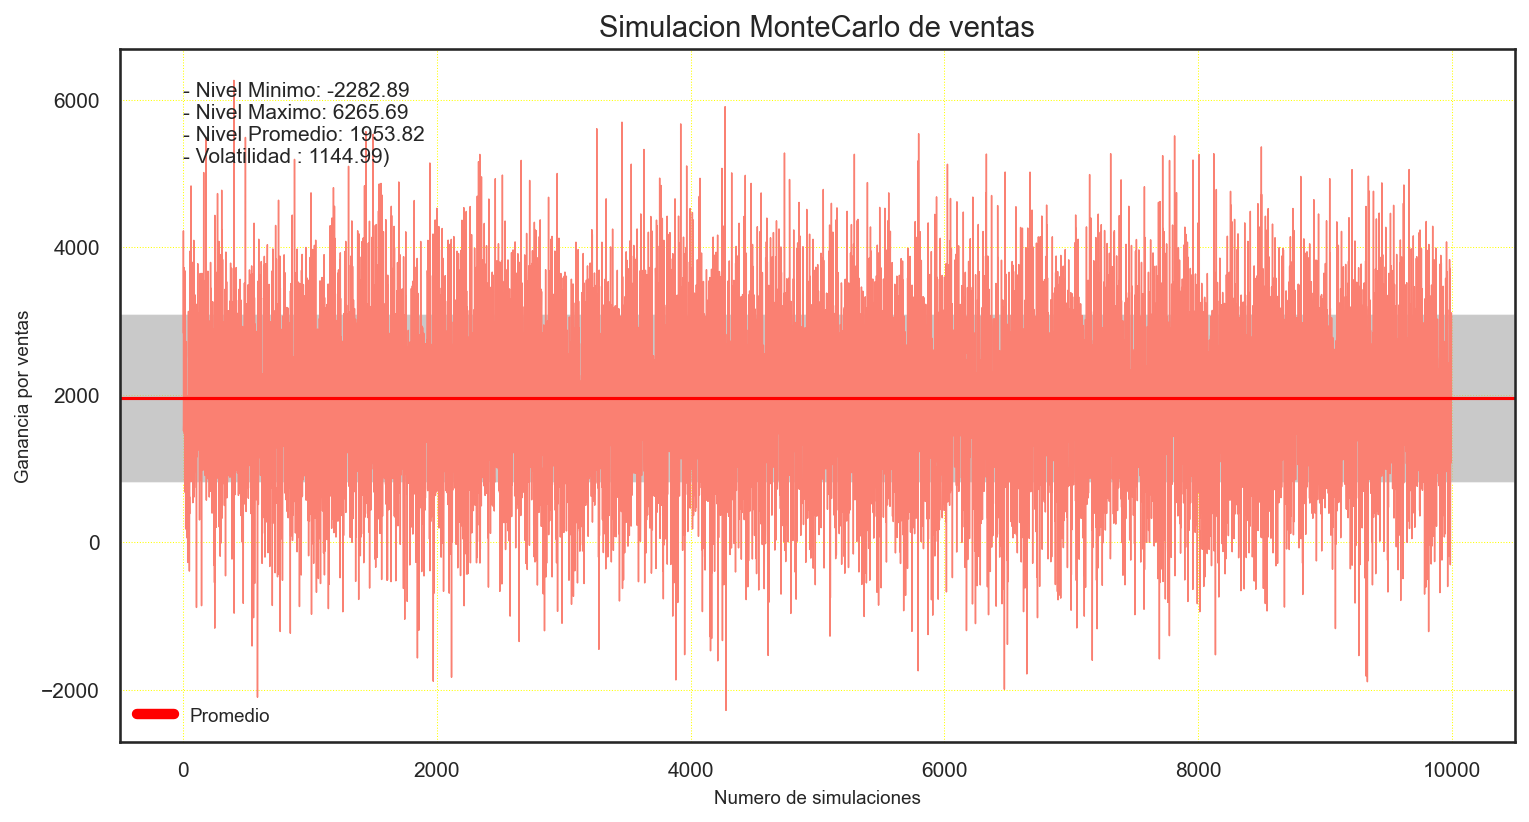

In [76]:
printmd("RESULTADOS")
#Creamos el diagrama con el resultado de las simulaciones de ventas
fig=plt.figure(dpi=150,figsize=(12,6))
fig.patch.set_facecolor('white')
plt.title('Simulacion MonteCarlo de ventas',fontsize=14)
plt.plot(media_ingresos,linewidth=5,c='red',label='Promedio')
plt.legend(loc='upper left')

plt.grid()
plt.grid(color='yellow',linestyle=':',linewidth=0.5)

plt.xlabel('Numero de simulaciones',fontsize=9)
plt.ylabel('Ganancia por ventas',fontsize=9)

plt.plot(utilidad_MonteCarlo,linewidth=0.7,color='salmon')
plt.axhline(y=media_ingresos,linewidth=1.5,color='red',linestyle='-')

# Añadiendo el área gris oscura a la figura que representa la distribución
plt.axhspan(media_ingresos-volatilidad_esperada,
            media_ingresos+volatilidad_esperada, facecolor='0.7',alpha=0.7)
plt.legend(loc='lower left',fontsize=9)
x_pos=1
y_pos=media_ingresos+(2.8*volatilidad_esperada)
plt.text(x_pos,y_pos, '- Nivel Minimo: {}\n'
                        '- Nivel Maximo: {} \n'
                         '- Nivel Promedio: {} \n'
                          '- Volatilidad : {})'
                             .format(rev_stats[0], rev_stats[1], rev_stats[2], rev_stats[3]) ,fontsize=10)
low_vol=media_ingresos-volatilidad_esperada
high_vol=media_ingresos+volatilidad_esperada

rev_mov=list(np.around(np.array([high_vol,low_vol]),2))
print('')
print('El mayor movimiento de ingresos $  (1 Standard Deviation) esta entre {} y {} en el area de color gris'.format(rev_mov[0],rev_mov[1]))


In [77]:
#llevamos la figura al archivo de excel
rng1=dfc_file.sheets['Sales Forecast'].range('F1')
ventas_sim_sht.pictures.add(fig,name='SalesForecast',update=True,top=rng1.top,left=rng1.left)

<Picture 'SalesForecast' in <Sheet [Flujo_de_caja.xlsx]Sales Forecast>>

El diagrama anterior se asemeja a un electrocardiograma, especialmente si el número de iteraciones es bajo. En el gráfico se puede ver el resultado de cada simulación. Los valores varían considerablemente, desde valores negativos de ingresos hasta valores positivos altos (por ejemplo, de -2000 MCHF a +6000 MCHF).
Dependiendo del número de simulaciones, las líneas del gráfico prácticamente se fusionan, lo que dificulta la lectura del valor exacto correspondiente a cada iteración.
Cuanto mayor sea el número de simulaciones, más se asemeja el diagrama a un gráfico de sonido (esta es mi asociación visual).


### Desarrollo de posibilidades de ingreso
Aqui veremos las diferentes formas que tienen los ingresos especificados en la variable umbral.
El objetivo del codigo a continuacion es presentar el resultado en una vista estadistica clara

In [78]:
printmd('RESULTADOS')
print("Ingresos Esperados(MCHF): \n Ingreso Minimo: {} MCHF \n Ingreso Maximo: {} MCHF"
     "\n Ingreso Promedio: {} MCHF \n Volatilidad: {} MCHF"
     .format(rev_stats[0],rev_stats[1],rev_stats[2],rev_stats[3]))
print('')
# Esta es la función que calculará las diferentes posibilidades en función de los umbrales predefinidos.
def rev_possibilities(data,monte_carlo,iteraciones):
    for i in data:
        per=[]
        threshold=[] #liminte
        ### Verificar si los ingresos son mayores que el umbral de ingresos, es decir, 500 MCHF
        above_certain=monte_carlo[np.where(monte_carlo>i)]
        ##Verificamos cuantas veces aparecen los ingresos umbral en la lista
        ##Divido por el total de iteraciones para encontrar la probabilidad
        percentage=round((above_certain.size/iteraciones*100),2)
        per.append(percentage)
        threshold.append(i)
        print("Probabilidad de ingresos mayores a {} MCHF:{}%".format(i,percentage))

printmd('POSIBILIDADES DE IMPORTE DE INGRESOS')
rev_possibilities(umbral_de_ventas,utilidad_MonteCarlo,iteraciones)
low_vol=media_ingresos-volatilidad_esperada
high_vol=media_ingresos+volatilidad_esperada
rev_mov=list(np.around(np.array([high_vol,low_vol]),2))
print('')
print('Mayor movimiento de ingresos en  MCHF (1 Desviacion Standard) entre {} y {} en el area gris.'.format(rev_mov[0],rev_mov[1]))


<span style='color:orange'></spna><span style='font-weight: bold'>RESULTADOS</span>

Ingresos Esperados(MCHF): 
 Ingreso Minimo: -2282.89 MCHF 
 Ingreso Maximo: 6265.69 MCHF
 Ingreso Promedio: 1953.82 MCHF 
 Volatilidad: 1144.99 MCHF



<span style='color:orange'></spna><span style='font-weight: bold'>POSIBILIDADES DE IMPORTE DE INGRESOS</span>

Probabilidad de ingresos mayores a 500 MCHF:89.96%
Probabilidad de ingresos mayores a 700 MCHF:86.15%
Probabilidad de ingresos mayores a 900 MCHF:82.09%
Probabilidad de ingresos mayores a 1100 MCHF:77.29%
Probabilidad de ingresos mayores a 1500 MCHF:65.7%
Probabilidad de ingresos mayores a 2000 MCHF:48.66%

Mayor movimiento de ingresos en  MCHF (1 Desviacion Standard) entre 3098.81 y 808.83 en el area gris.


Intentemos visualizar los datos de ventas pronosticados con un histograma (el primer gráfico de la figura a continuación).
Cuanto mayor sea el número de iteraciones, más cercano será el resultado a la distribución normal.
En el histograma, podemos ver el valor promedio representado por la línea roja horizontal.

Cuantas más simulaciones hagamos, mejor representaremos la realidad, y el histograma mostrará una forma más clara y precisa de la distribución de ventas esperadas. 🚀

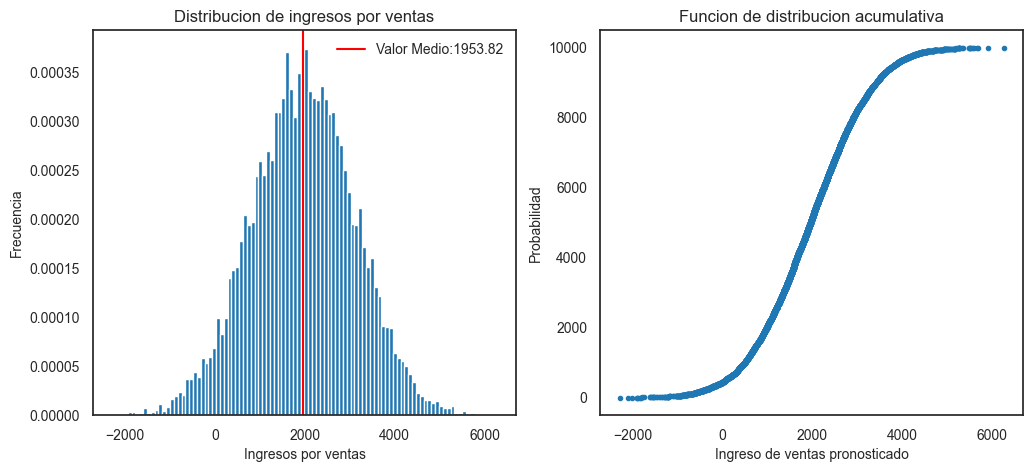

In [79]:
sim_figura_ventas=plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
#Histograma del valor estimado de la empresa
plt.hist(ventas_df['Forecasted Sales Revenue'],density=True,bins=100) #bins divide en segmentos 
#inplace sirve para modificar de forma directa el df
#axis 0 fila, axis 1 columna
plt.xlabel("Ingresos por ventas")
plt.ylabel('Frecuencia')
plt.title('Distribucion de ingresos por ventas', fontsize=12)
plt.axvline(ventas_df['Forecasted Sales Revenue'].mean(), label=f'Valor Medio:{rev_stats[2]:.2f}',color='r')
plt.legend()

plt.subplot(1,2,2)
x=np.sort(ventas_df['Forecasted Sales Revenue'])
y=np.arange(1,len(x)+1/len(x))
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Ingreso de ventas pronosticado')
plt.ylabel('Probabilidad')
plt.title('Funcion de distribucion acumulativa')
plt.show()

In [80]:
#llevamos los graficos a excel
rng2=dfc_file.sheets['Sales Forecast'].range('F27')
ventas_sim_sht.pictures.add(sim_figura_ventas,name='Sales Forecast Histogram & CDF', update=True,top=rng2.top,left=rng2.left)

<Picture 'Sales Forecast Histogram & CDF' in <Sheet [Flujo_de_caja.xlsx]Sales Forecast>>

In [81]:
rev_stats[2]

1953.82

#### Funcion de distribucion acumulada
La función de distribución acumulativa (FDA) de una variable aleatoria es otro método para describir la distribución de variables aleatorias. La ventaja de la FDA es que puede definirse para cualquier tipo de variable aleatoria.
La función de distribución acumulativa (FDA) de la variable aleatoria X se define como: \
<h5 style="text-align:center">FX(x)=P(X<=x)</h5>

Para todo x perteneciente a los reales R,Muestra la probabilidad de que el valor de la empresa caiga por debajo de un nivel de riesgo.
Este es el segundo diagrama que visualiza los datos calculados anteriormente.\
Por ejemplo, en el segundo gráfico de la figura anterior, podemos ver que hay un 20 % de probabilidad de que el volumen de ventas sea inferior a 1000 millones de francos suizos (MMHF), inferior a 2000 millones de francos suizos (MMHF), alrededor del 50 %, etc.

<h4 style="color:#0ce787">2. SIMULACION DE LA TASA DE CRECIMIENTO DE VENTAS</h4>

Ahora realizaremos la simulacion de Monte Carlo, sobre la tasa de crecimiento de ventas. Nuevamente parte del codigo utilizado para
las dos siguientes simulaciones proviene de Rizwan Ahmed Surhio y se modifico para adaptarse al estilo y los requisitos actuales
del proyecto.
El resultado de esta simulacion se utilizara como entrada de la simulacion final, que calculara el valor de la empresa segun el metodo 
de flujo de caja descontado.

Utilizaremos np para la generación inicial de la tasa de crecimiento basada en los datos históricos de ventas.

<li>np.exp: calcula la exponencial de todos los elementos del array de entrada.</li>
<li>np.diff: calcula la n-ésima diferencia discreta a lo largo del eje dado. La primera diferencia viene dada por out[i] = a[i+1] - a[i] a lo largo del eje dado. Las diferencias mayores se calculan utilizando diff recursivamente. Ejemplos: x = np.array([1,2,4,7,0]) np.diff(x) array([1,2,3,-7])</li>
<li>np.log: logaritmo neperiano, elemento por elemento. El logaritmo neperiano es el inverso de la función exponencial, por lo que log(exp(x)) = x. El logaritmo neperiano es un logaritmo en base e.</li>


In [82]:
# Cálculo de la tasa de crecimiento de ventas utilizando los datos históricos de ventas; esta es la tendencia histórica
tasa_crecimiento=np.exp(np.diff(np.log(ventas_actuales['Sales'])))-1
t_crec_df=pd.DataFrame(tasa_crecimiento,columns=['Tasa de crecimiento historico'])
#calculamos la media y desviacion standard
tasa_crecimiento_media=tasa_crecimiento.mean()
tasa_crecimiento_std=tasa_crecimiento.std()
# Generación de la simulación basada en números aleatorios (Distribución Normal) y el número predefinido de iteraciones
crecimiento_monte_carlo=np.random.normal(tasa_crecimiento_media,tasa_crecimiento_std,iteraciones)
crecimiento_df=pd.DataFrame(crecimiento_monte_carlo,columns=['Crecimiento de ventas previsto'])

min_crecimiento=crecimiento_monte_carlo.min()
max_crecimiento=crecimiento_monte_carlo.max()
promedio_ingresos_crecimiento=crecimiento_monte_carlo.mean()
volatilidad_esperada_c=crecimiento_monte_carlo.std()

In [83]:
crecimiento_df.head()

,Crecimiento de ventas previsto
0,-0.231346
1,-0.225810
2,0.185413
3,-0.000130
4,0.249577


In [84]:
# Visualización de la tendencia de la tasa de crecimiento en formato de tabla
t_crec_df.tail()

,Tasa de crecimiento historico
13,-0.088542
14,0.021799
15,0.113505
16,-0.293155
17,-0.246053


In [85]:
# Tomar los nombres de las hojas en una nueva lista para verificar si la hoja ya existe 
sNamList=[sh.name for sh in dfc_file.sheets]
sNamList

['Simulation', 'Sales Forecast', 'Hoja1']

In [86]:
# Ahora se creará/borrará la nueva hoja para la simulación de la tasa de crecimiento en el archivo de Excel de trabajo.
# Se comprobará si la hoja que necesitamos ya existe en el archivo de Excel.
if 'Growth Forecast' in sNamList:
    dfc_file.sheets('Growth Forecast').clear()
else:
    crec_sim_sht=dfc_file.sheets.add('Growth Forecast')

In [87]:
crec_sim_sht=dfc_file.sheets('Growth Forecast')
crec_sim_sht

<Sheet [Flujo_de_caja.xlsx]Growth Forecast>

In [88]:
#guardando los datos en el documento excel
crec_sim_sht.range('A1').options(pd.DataFrame, index=False).value=crecimiento_df

In [89]:
crec_sim_sht.range('C1').options(pd.DataFrame, index=False).value=t_crec_df

In [90]:
# Descriptive statistics (variant 2)
c_estadisticas=crecimiento_df.describe()
c_estadisticas

,Crecimiento de ventas previsto
count,10000.000000
mean,-0.053873
std,0.217898
min,-0.856690
25%,-0.202680
50%,-0.051361
75%,0.097707
max,0.708883


In [91]:
#agregamos las estadisticas al documento excel
crec_sim_sht.range('E1').value=c_estadisticas

In [92]:
# Definición de los rangos de celdas que se formatearán: los datos de salida de la simulación
c_range=crec_sim_sht.range('A1').expand() # las primeras 3 columnas completas
c_header_range=crec_sim_sht.range('A1').expand('right') #los header de la columna A,B
c_data_range=crec_sim_sht.range('A2').expand() #solo los datos de las columnas
# Definición de los rangos que serán formateados
c_hist_range=crec_sim_sht.range('C1').expand()
c_hist_header_range=crec_sim_sht.range('c1').expand('right')
c_hist_data_range=crec_sim_sht.range('C2').expand()
# Definición del rango que se formateará a partir del marco de datos de estadísticas descriptivas
c_stats_range=crec_sim_sht.range('e1').expand()
c_stats_header_range=crec_sim_sht.range('F1').expand('right')
c_stats_data_range=crec_sim_sht.range('F2').expand()
c_stats_name_range=crec_sim_sht.range('E2').expand('down')

In [93]:
#fuente y tamaño
header=[c_header_range,c_stats_header_range,c_stats_name_range,c_hist_header_range]
for cells in header:
    cells.api.Font.Name='Arial'
    cells.api.Font.Size=11
    cells.api.Font.Bold=True
    cells.color=rgb_to_int((204, 41, 54))#color de fondo
    cells.api.Font.Color=rgb_to_int((241, 191, 152))#color de letra
    cells.column_width=13
    cells.api.WrapText=True
    

In [94]:
#Alineando al centro
c_data_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
c_stats_data_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter
c_hist_data_range.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

In [95]:
c_stats_name_range.autofit()


In [96]:
#formato de los numeros
c_data_range.number_format='0,00'
c_stats_data_range.number_format='0,00'
c_hist_data_range.number_format='0,00'

c_data_range.color=(196, 255, 249)
c_stats_data_range.color=(210, 161, 184)
c_hist_data_range.color=(156, 234, 239)

In [97]:
#dando estilo al borde
for border_id in range(7,13):
    c_range.api.Borders(border_id).Color = 0xFFFFFF # white border frame
    c_range.api.Borders(border_id).Weight = 2 # thin border
    
    c_stats_range.api.Borders(border_id).Color = 0xFFFFFF # white border frame
    c_stats_range.api.Borders(border_id).Weight = 2 # thin border
    
    c_hist_range.api.Borders(border_id).Color = 0xFFFFFF # white border frame
    c_hist_range.api.Borders(border_id).Weight = 2 # thin border

Ahora visualicemos el resultado de la simulación en un gráfico que posteriormente se copiará en el modelo.
El código, la lógica y el gráfico principal son similares a los de la simulación anterior para la previsión de ingresos por ventas.

<span style='color:orange'></spna><span style='font-weight: bold'>RESULTADO:</span>

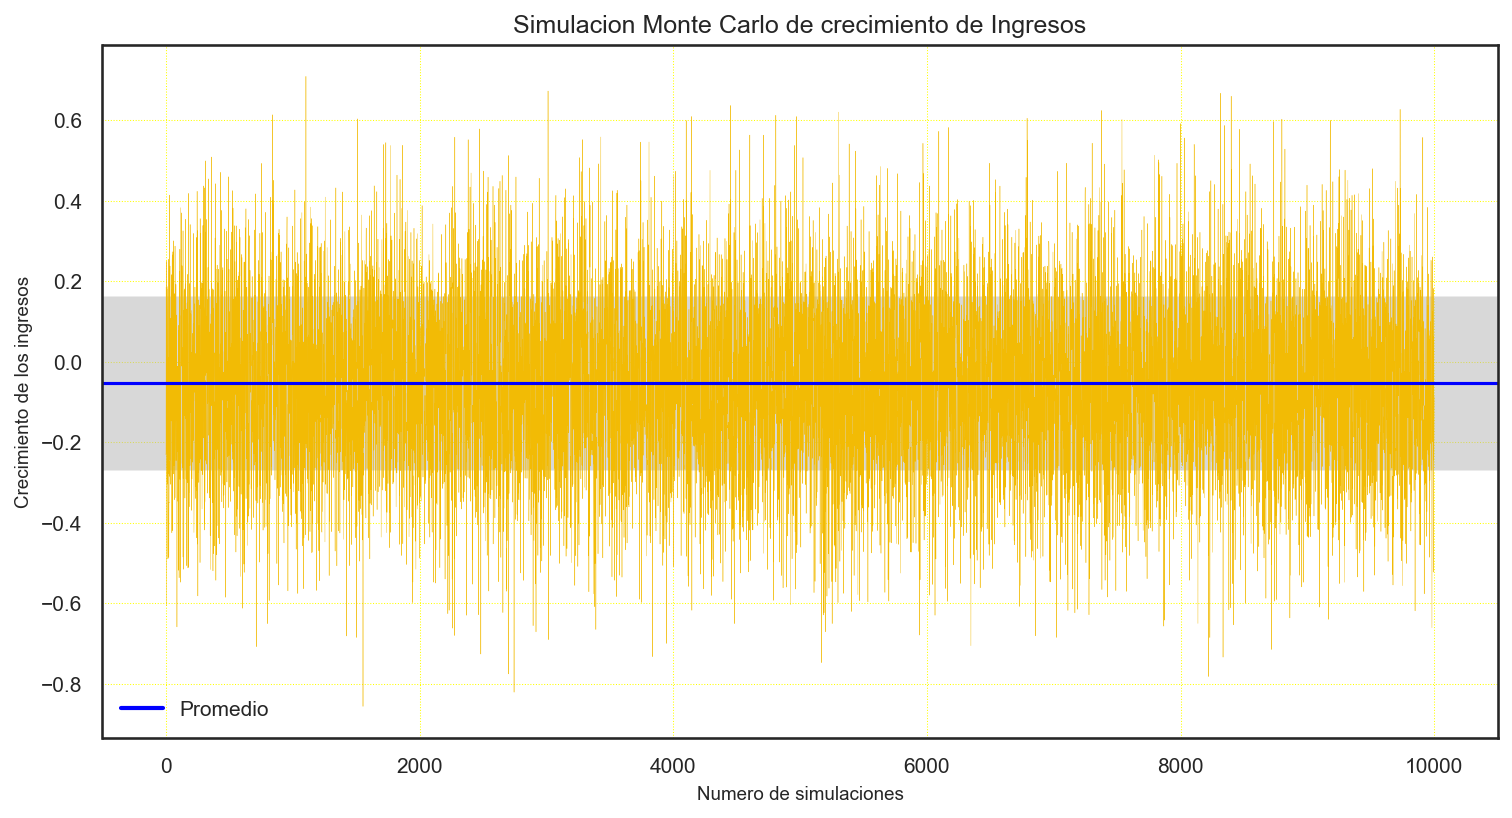

<span style='color:orange'></spna><span style='font-weight: bold'>RESULTADOS:</span>

Crecimiento esperado: 
Crecimiento Minimo: -0.86
Crecimiento Maximo: 0.71
Promedio de Crecimiento: -0.05
Volatilidad: 0.22 




<span style='color:orange'></spna><span style='font-weight: bold'>POSIBILIDADES DE LA TASA DE CRECIMIENTO DE LOS INGRESOS:</span>

Probabilidad de crecimiento mayor que 0.05: 32.41%
Probabilidad de crecimiento mayor que 0.07: 29.33%
Probabilidad de crecimiento mayor que 0.1: 24.68%
Probabilidad de crecimiento mayor que 0.13: 20.08%
Probabilidad de crecimiento mayor que 0.15: 17.26%
Probabilidad de crecimiento mayor que 0.2: 11.75%

El principal movimiento de crecimiento de los ingresos (1 desviacion standard) esta entre 0.16 y -0.27 en el area gris


In [98]:
printmd("RESULTADO:")
g=crecimiento_monte_carlo
g_fig=plt.figure(dpi=150,figsize=(12,6))
plt.title('Simulacion Monte Carlo de crecimiento de Ingresos',fontsize=12)
plt.plot(promedio_ingresos_crecimiento,linewidth=2,c='blue',label='Promedio',linestyle='-')
plt.legend(loc='lower left')

plt.grid(color='yellow',linestyle=':',linewidth=0.5)
plt.xlabel('Numero de simulaciones', fontsize=9)
plt.ylabel('Crecimiento de los ingresos',fontsize=9)

# Añadiendo el área gris oscura a la figura que representa la distribución
plt.axhspan(promedio_ingresos_crecimiento-volatilidad_esperada_c,promedio_ingresos_crecimiento+volatilidad_esperada_c,facecolor='0.7',alpha=0.5)
plt.plot(g,linewidth=0.2,color='#f2bb05')
plt.axhline(y=promedio_ingresos_crecimiento,linewidth=1.5,color='blue',linestyle='-')
plt.show()

printmd("RESULTADOS:")
c_stats=list(np.around(np.array([min_crecimiento,max_crecimiento,promedio_ingresos_crecimiento,volatilidad_esperada_c]),2))
print("Crecimiento esperado: \n"
        "Crecimiento Minimo: {}\n"
          "Crecimiento Maximo: {}\n"
              "Promedio de Crecimiento: {}\n"
              "Volatilidad: {} \n".format(c_stats[0],c_stats[1],c_stats[2],c_stats[3])
        )
print('')
# Definir la función con la que visualizar el resultado
def rev_possibilities(data,monte_carlo,iteraciones):
    for i in data:
        per=[]
        threshold=[]
        ## Verificar si los ingresos son mayores que el umbral de ingresos, es decir, 400 MCHF
        above_certain=monte_carlo[np.where(monte_carlo>i)]
        ## Verificar cuántas veces aparece el ingreso umbral 
        ## en la lista dividido por el total de iteraciones ## para encontrar la probabilidad
        percentage=round((above_certain.size/iteraciones*100),2)
        per.append(percentage)
        threshold.append(i)
        print("Probabilidad de crecimiento mayor que {}: {}%".format(i,percentage))
printmd("POSIBILIDADES DE LA TASA DE CRECIMIENTO DE LOS INGRESOS:")
rev_possibilities(umbral_de_crecimiento,crecimiento_monte_carlo,iteraciones)
low_c_vol=promedio_ingresos_crecimiento-volatilidad_esperada_c
high_c_vol=promedio_ingresos_crecimiento+volatilidad_esperada_c
c_list=list(np.around(np.array([low_c_vol,high_c_vol]),2))
print("")
print("El principal movimiento de crecimiento de los ingresos (1 desviacion standard) esta entre {} y {} en el area gris".format(c_list[1],c_list[0]))

El diagrama es bastante similar al de la simulación anterior, con la salvedad de que aquí se revisan los posibles valores aleatorios de las tasas de crecimiento, no los ingresos por ventas.
Esta cifra también se incluirá en el archivo de Excel.
Las posibilidades de tener las tasas de crecimiento dentro de los rangos predefinidos se pueden ver en las estadísticas anteriores preparadas con el diagrama.

In [99]:
rng3=dfc_file.sheets['Growth Forecast'].range('H1')
crec_sim_sht.pictures.add(g_fig,name='Simulacion Monte Carlo de crecimiento de ingresos',update=True,top=rng3.top,left=rng3.left)

<Picture 'Simulacion Monte Carlo de crecimiento de ingresos' in <Sheet [Flujo_de_caja.xlsx]Growth Forecast>>

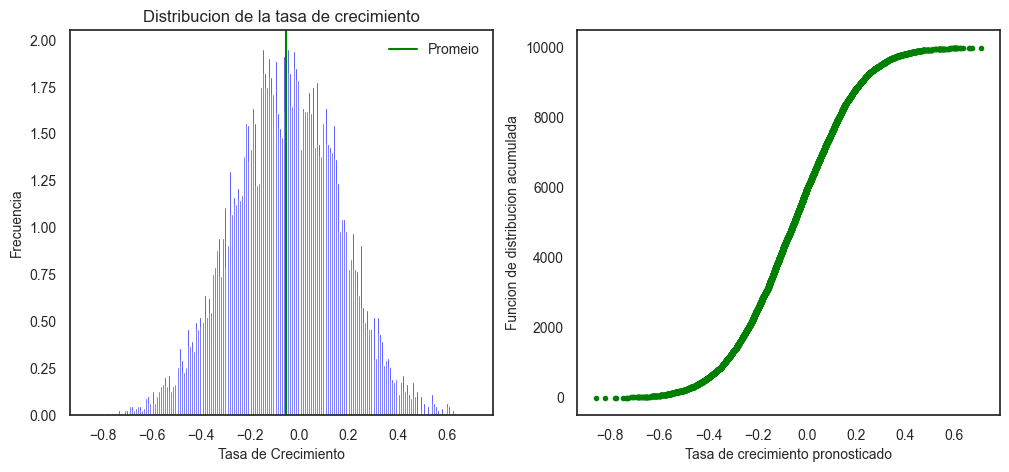

In [100]:
g_figure=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(crecimiento_df['Crecimiento de ventas previsto'],density=True,bins=200,color='blue')
plt.xlabel('Tasa de Crecimiento')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la tasa de crecimiento', fontsize=12)
plt.axvline(crecimiento_df['Crecimiento de ventas previsto'].mean(),label='Promeio', color='green')
plt.legend()

plt.subplot(1,2,2)
x=np.sort(crecimiento_df['Crecimiento de ventas previsto'])
y=np.arange(1,len(x)+1/len(x))
plt.plot(x,y,marker='.',linestyle='none',color='green')
plt.xlabel('Tasa de crecimiento pronosticado')
plt.ylabel('Funcion de distribucion acumulada')
plt.show()

In [101]:
rng4=dfc_file.sheets['Growth Forecast'].range('H27')
crec_sim_sht.pictures.add(g_figure,name='Figure 2', update=True,top=rng4.top,left=rng4.left)

<Picture 'Figure 2' in <Sheet [Flujo_de_caja.xlsx]Growth Forecast>>

Según el histograma, podemos observar la distribución de los resultados relacionados con la tasa de crecimiento de las ventas, según el modelo de simulación de Monte Carlos. Se asemeja al histograma de distribución normal, con un valor promedio representado por la línea horizontal verde.
El segundo gráfico es la función de distribución acumulativa, donde podemos ver la probabilidad de que la tasa de crecimiento sea inferior o superior a un valor determinado. Por ejemplo, la probabilidad de una tasa de crecimiento negativa (menor a 0,00) es de 0,6 (desafortunadamente, la tendencia histórica de la tasa de crecimiento de las ventas tampoco fue favorable).

<h4 style="color:#d1345b">3. Simulacion Monte Carlo respecto al Valor de la Empresa basado en el modelo de Flujo de Caja Descontado </h4>

El Valor Presente Neto (VAN) se obtiene al restar la inversión inicial a la suma de los flujos de caja descontados.

Y volvemos a la simulación de Monte Carlo para la evaluación del valor de la empresa. En este caso, basándome en los resultados de la simulación anterior, construiré el último modelo para cumplir el objetivo principal del proyecto: la estimación del valor de la empresa en 5 años mediante el método de flujo de caja descontado (DCF).

Para crear el modelo, intentaré utilizar dos tipos de distribución (para lograr cierta diversidad): la normal y la uniforme.

#### Distribucion Normal
La distribución normal, también conocida como distribución gaussiana o de Gauss, se utiliza ampliamente en ciencias naturales y sociales. Su relevancia reside en el Teorema del Límite Central, que establece que los promedios obtenidos de variables aleatorias independientes con distribución idéntica tienden a formar distribuciones normales, independientemente del tipo de distribución del que se extraigan.
Se utilizará para generar los valores aleatorios de la tasa de crecimiento a partir de los valores promedio y de desviación estándar obtenidos en la simulación anterior.

#### Distribucion Uniforme
La distribución uniforme es la distribución estadística más simple. El concepto de distribución uniforme, así como las variables aleatorias que describe, constituyen la base del análisis estadístico y la teoría de la probabilidad. El porcentaje de probabilidad es 1 dividido entre el número total de resultados.
Esta distribución se utilizará para generar los valores aleatorios de las tasas de descuento esperadas. En este caso, se aplicará el supuesto de una tasa de descuento mínima del 5 % y máxima del 10 % para la simulación.